# [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

# B資yKenny -東海

# 背景
![](./house_price_regression.png)

# 數據探索

In [139]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

In [140]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
train.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [143]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


* ID特徵對分類沒有影響，但最後提交的時候需要，故保留下來

In [144]:
#檢查維度
print("訓練集丟棄ID特徵前的size: ",train.shape)
print("測試集丟棄ID特徵前的size: ",test.shape)

#單獨保存ID列
train_ID = train['Id']
test_ID = test['Id']

#去掉ID列
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#檢查數據維度
print("\n訓練集丟棄ID特徵後的size: ",train.shape)
print("測試集丟棄ID特徵後的size: ",test.shape)

訓練集丟棄ID特徵前的size:  (1460, 81)
測試集丟棄ID特徵前的size:  (1459, 80)

訓練集丟棄ID特徵後的size:  (1460, 80)
測試集丟棄ID特徵後的size:  (1459, 79)


## 數據處理

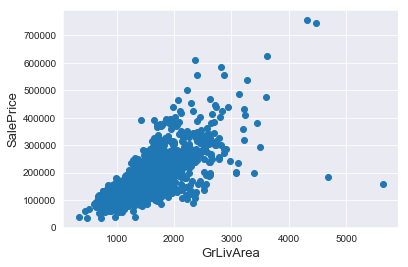

In [145]:
#繪圖
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [146]:
train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


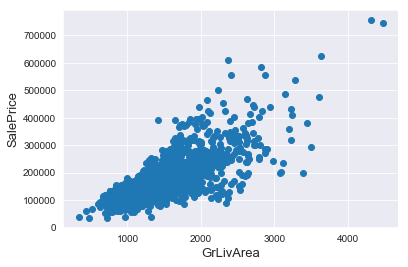

In [147]:
#刪除離群點
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

- 目標處理:
  - 線性模型需要正態分布的目標值才能發揮最大的作用。 我們需要檢測房價什麼時候偏離正態分布。使用proplot函數,及正態概率圖:



 mu = 180932.92 and sigma = 79467.79



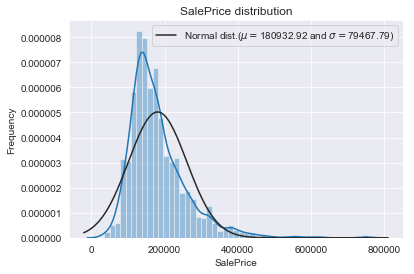

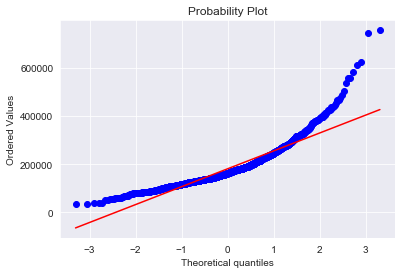

In [148]:
sns.distplot(train['SalePrice'], fit = norm)

#擬合正態分布
(mu , sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 繪圖
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#原始數據分布繪圖
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

* 此時的正態分布為右偏態分布，整體峰值向左偏離，並且偏度(skewness)較大，需要對目標值做log轉換，以恢復目標值的正態性。


 mu = 12.02 and sigma = 0.40



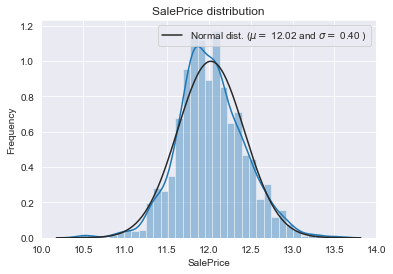

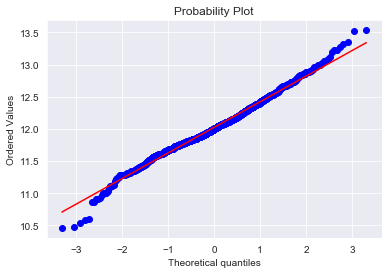

In [149]:
#使用log1p函數完成log(1+x)變換
train['SalePrice'] = np.log1p(train['SalePrice'])

#查看調整後的分布
sns.distplot(train['SalePrice'], fit = norm)

# 重新擬合
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 重新繪製正态分布
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 繪製轉變後的分布
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# 特徵工程:

In [150]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print("合併後的數據集的size: ", all_data.shape)

合併後的數據集的size:  (2917, 79)


## 缺失值可視化

Text(0.5,1,'Percent missing data by feature')

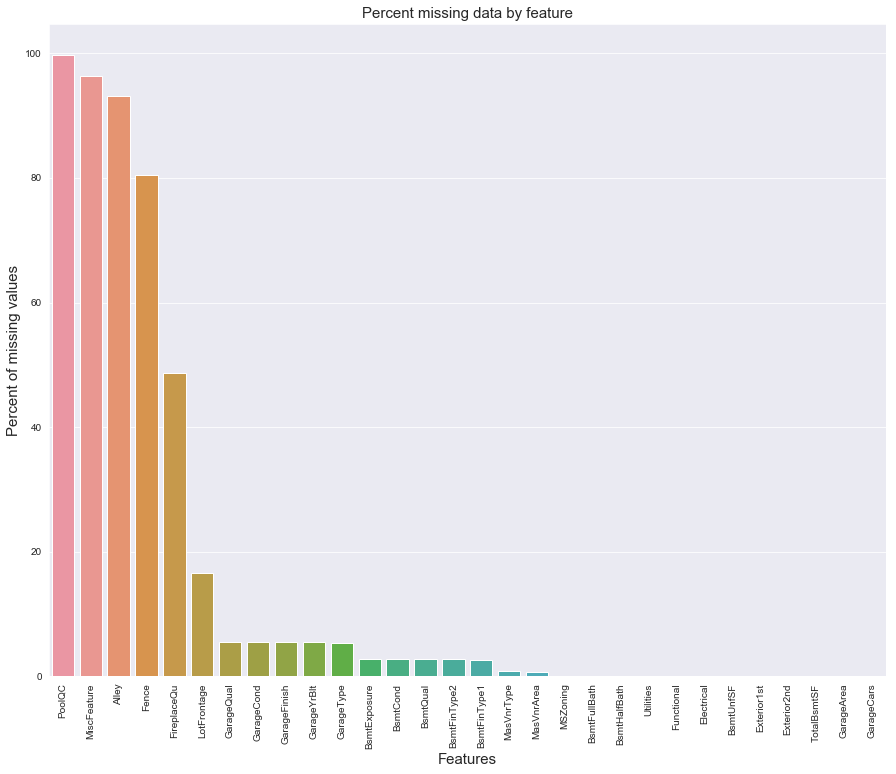

In [151]:
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

f, ax =plt.subplots(figsize = (15,12))
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Percent missing data by feature', fontsize = 15)

* 分析各個特徵與房價的相關性，使用熱力圖:

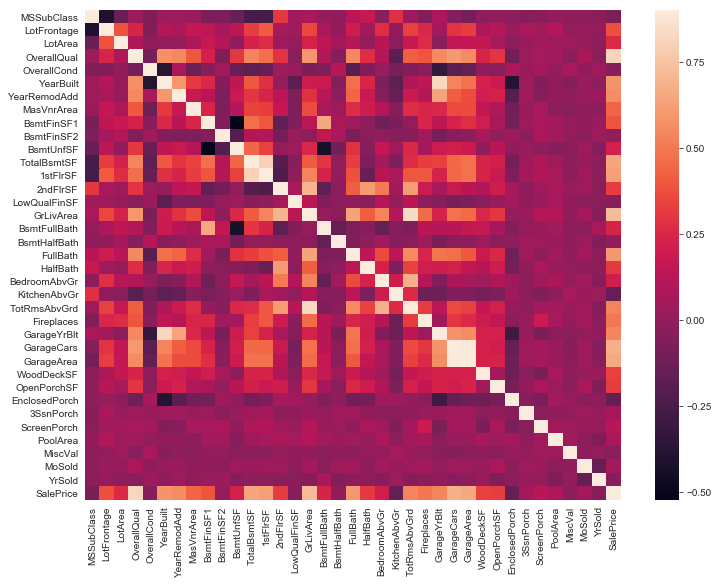

In [152]:
#繪製熱力塗去查看特徵相關性
corrmat = train.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 0.9)

 值得注意的是，有兩個正方形小塊:TotaLBsmtSF和1stFlrSF、GarageAreas和GarageCars處，這代表全部建築面積TotaLBsmtSF與一層建築面積1stFlrSF成強正相關，車庫區域GarageAreas和車庫車輛GarageCars成正相關，那麼在填補缺失值就有了依據，我們可以直接刪掉一個多餘的特徵或者使用一個填補另一個。

- 補充from [Predicting HousingPrices-Simple Approach: LB-Top3%](https://www.kaggle.com/abhinand05/predicting-housingprices-simple-approach-lb-top3)

- We can see that the features OverallQual, GarageArea and YearBuilt are closely correlated with the sale price. That means these features play an important role in determining the SalePrice of a house. Similarly a lot of inferences can be made just by looking at the heatmap but we're not going to go through each one of them. 

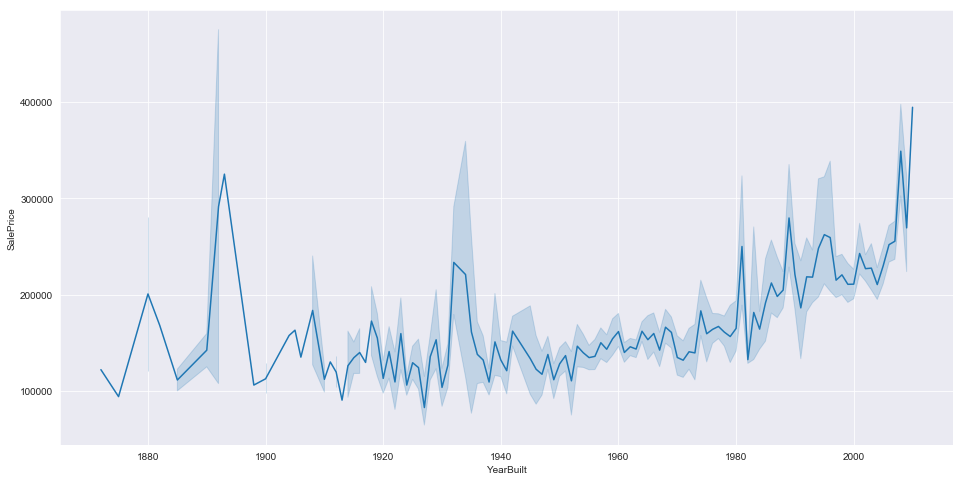

In [153]:
test1 = pd.read_csv('./input/train.csv')
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='YearBuilt', y='SalePrice', data=test1)

You might have noticed a significant increase in SalePrices just after the start of the 21st century, which is pretty interesting. What's even more surprising is the late 1800s saw phenomenal increase in SalePrices but dropping way below even before the end of that century.

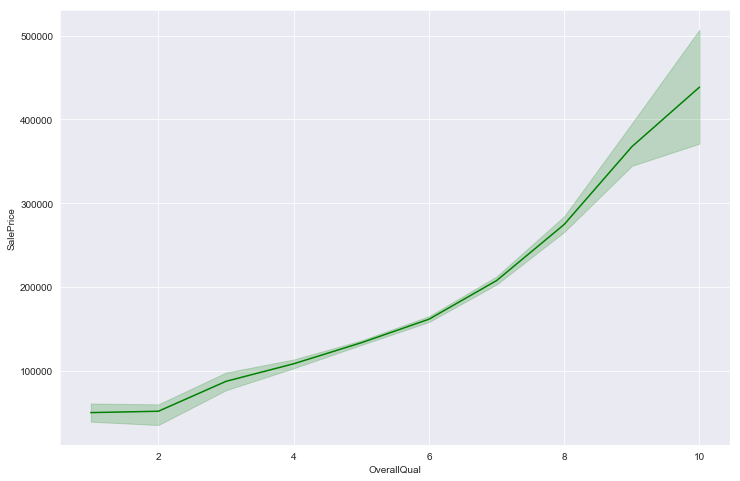

In [154]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='OverallQual', y='SalePrice', color='green',data=test1)

We can see that the SalePrices increase rapidly with houses with better overall quality which is pretty reasonable.

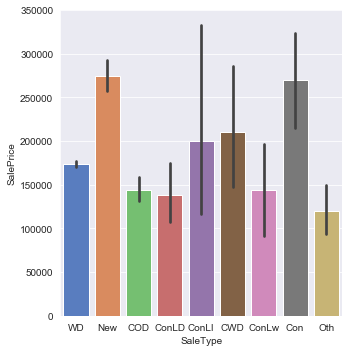

In [155]:
sns.catplot(x='SaleType', y='SalePrice', data=test1, kind='bar', palette='muted')

It is clear that the selling prices for Sale types New and Con are significantly higher than the others.

填補缺失值:

In [156]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x:x.fillna(x.median()))

for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#對於utilities 這個特徵，所有紀錄均為'AllPub'，除了一個'NoSeWa'和兩個NA。 由於擁有'NoSewa'的房子在訓練集中，
# 因此此特徵對於建模沒有幫助，故刪除
all_data = all_data.drop(['Utilities'],axis = 1)

all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [157]:
all_data_na

Series([], dtype: float64)

## 更多的數據工程: 

1. 有許多的特徵實際上是類別型的特徵，但給出來的是數字。比如MSSubCalss，是平價房子的種類的一整特徵，給出的是10-100的數字。需要將其轉換為字串的類別。

In [158]:
#MSSubClass是房子種類
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# 同樣對OverallCond 做轉換
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# 年分與月份
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

2. 接下來做LabelEncoder，對部分類別的特徵進行編號

In [159]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#使用LabelEncoder做轉換
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

#查看維度
print('all_data的數據維度:{}'.format(all_data.shape))

all_data的數據維度:(2917, 78)


3. 添加一個重要的特徵，因為買房會實際考量到總面積的大小，但是此數據集中並沒有包含相關數據。總面積等於地下室面家+1層面積+2層面積

In [160]:
#添加總面積特徵
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

4. 我們對房價進行分析，不符合正態我們將其做log轉換，那麼我們也對特徵進行相同操作

In [161]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

#對所有數執行特徵進行skew計算偏度
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head()


 Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372


In [162]:
skewness = skewness[abs(skewness)>0.75]
print('總共有{}數值型的特徵做轉換'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] +=1
    all_data[feat] = boxcox1p(all_data[feat],lam)

總共有59數值型的特徵做轉換


5. 特徵做one-hot ecoding

In [163]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


6. 獲得新的訓練與測試集。至此，特徵工程處理完畢。

In [164]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# 模型選擇 

## 導入庫:

In [165]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

使用sklearn 的 cross_val_score 函數。然而這個函數沒有shuffle的方法， 所以自定義一行代碼，為了在交叉驗證之前shuffle數據集

In [166]:
#交叉驗證數
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# def rmse(y, y_pred):
#     return np.sqrt(mean_squared_error(np.log(y), y_pred)))

Score 的方法為MSE，建立幾個基模型:
1. LASSO Regression:
    *該模型對異常值很敏感，所以我們在pipeline上使用sklearn的Robustscaler()方法 

![](.\pipeline.PNG)

In [167]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

2. Elastic Net Regression:
    * 同樣讓他對異常值具有更好的魯棒性 

In [168]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = .9, random_state = 3))

3. Kernel Ridge Regression:

In [169]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

4. Gradient Boosting Regression:
    * 由於Huber loss使得他對於異常值具有魯棒性

In [170]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

5. XGBoost:

In [171]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

6. LightGBM:

In [172]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

來看看各個模型交叉驗證的得分:

In [173]:
score = rmsle_cv(lasso)
print("\nLasso 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso 得分: 0.1115 (0.0074)



In [174]:
score = rmsle_cv(ENet)
print("ElasticNet 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet 得分: 0.1116 (0.0074)



In [175]:
score = rmsle_cv(KRR)
print("Kernel Ridge 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge 得分: 0.1153 (0.0075)



In [176]:
score = rmsle_cv(GBoost)
print("Gradient Boosting 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting 得分: 0.1177 (0.0080)



In [177]:
score = rmsle_cv(model_xgb)
print("Xgboost 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost 得分: 0.1151 (0.0069)



In [178]:
score = rmsle_cv(model_lgb)
print("LGBM 得分: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM 得分: 0.1162 (0.0071)



# 6. 模型融合

&emsp;&emsp;Stacking模型融合：Average-Stacking  
&emsp;&emsp;簡單的平均基本模型的方法。 

In [179]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 用數據擬合所有的模型
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 對結果做average
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [180]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" 最集成後的模型的得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 最集成後的模型的得分: 0.1091 (0.0075)



Meta-model Stacking：
在這種方法中，我們在平均基礎模型上添加Meta-model，並使用這些基模型的out-of-folds預測來訓練我們的Meta-model。
訓練部分的步驟如下：
1、將整個訓練集分解成兩個不相交的集合（這裡是train和.holdout）。
2、在第一部分（train）上訓練幾個基本模型。
3、在第二個部分（holdout）上測試這些基本模型。
4、使用(3)中的預測（稱為 out-of-fold 預測）作為輸入，並將正確的標籤（目標變量）作為輸出來訓練更高層次的學習模型稱為元模型。
前三個步驟是迭代完成的。例如，如果我們採取5倍的fold，我們首先將訓練數據分成5次。然後我們會做5次迭代。在每次迭代中，我們訓練每個基礎模型4倍，並預測剩餘的fold（holdout fold）。

In [181]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # 用數據擬合所有的模型
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # 得到元模型，並用元模型對out_of_fold做预估，為學習stacking的第2層做數據準備
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # 學習stacking模型
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # 做stacking预估
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [182]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1084 (0.0074)


In [183]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [184]:
#StackedRegressor:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07814905151549843


In [185]:
#XGBoost:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07879894799249872


In [186]:
#LightGBM:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07307464036005418


In [187]:
'''RMSE on the entire Train data when averaging'''

print('訓練集上的RMSLE得分:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15  + lgb_train_pred*0.15 ))

訓練集上的RMSLE得分:
0.07543044053057422


將三者進行融合，然後得到Ensemble prediction：

In [188]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [189]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission2.csv',index=False)

In [ ]:
models = [GBoost, model_xgb,model_lgb, random_forest]

![](number.PNG)

![test](test.PNG)

### 9. Reference：

[Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
[Top 2% of LeaderBoard - Advanced FE](https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe)

[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

[sklearn 中的 Pipeline 机制](https://blog.csdn.net/lanchunhui/article/details/50521648)

.[python sklearn模型中random_state参数的意义](http://sofasofa.io/forum_main_post.php?postid=1001204)

.[【机器学习】模型融合方法概述](https://zhuanlan.zhihu.com/p/25836678)

.[集成学习总结 & Stacking方法详解](https://blog.csdn.net/willduan1/article/details/73618677)

.[BOX-COX变换（学习笔记）-北京交通](https://wenku.baidu.com/view/96140c8376a20029bd642de3.html)

[Box-Cox 轉換半對數特徵房價模型實證研究 :](http://www.scu.edu.tw/ba/2007conference/2007paper/thesis/16-REM01.pdf)

.[【python】numpy库数组拼接快捷方式horizontal&vertical、np.c_、np.column_stack等官方文档详解与实例](https://blog.csdn.net/brucewong0516/article/details/79169577)





# 上傳大神的成績

![](God.PNG)

前6%

### 借用[Predicting HousingPrices-Simple Approach: LB-Top3%](https://www.kaggle.com/abhinand05/predicting-housingprices-simple-approach-lb-top3)的模型

Modelling
We'll start by building standalone models, validating their performance and picking the right ones. Later we will stack all our models into an ensemble for better accuracy.

I just played with a number of models and ended up picking the following models which gave me best results personally. If you find a better way please let me know :)

I tuned the hyperparameters by manually experimenting a lot based on previous experiences, saving you a bunch of time hopefully. Anyways if you find a set of parameters that can work even better let me know in the comments down below.

In [100]:
train2 = pd.read_csv('./input/train.csv')

In [101]:
train2 = train2.drop(train2[(train2['GrLivArea']>4000) & (train2['SalePrice']<300000)].index)

In [102]:
y = np.ravel(np.array(train2[['SalePrice']]))

In [103]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

In [104]:
X_train, X_test, y_train2, y_test = train_test_split(train, y, test_size=0.2)

#### Random Forest


In [105]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(random_forest, train, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.8816569888843503

In [107]:
# Fit the model to our data
random_forest.fit(train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [108]:
# Make predictions on test data
rf_pred = random_forest.predict(test)

#### Xgboost

In [109]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [110]:
# Initialize our model
xg_boost = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(xg_boost, train, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.925109258874995

In [111]:
# Fit our model to the training data
xg_boost.fit(train.values, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.6, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=6000, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=6e-05,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.7)

In [112]:
# Make predictions on the test data
xgb_test = test.as_matrix() # ValueError: feature_names mismatch: in xgboost in the predict() function
xgb_pred =xg_boost.predict(xgb_test)

[資料來源:](https://stackoverflow.com/questions/42338972/valueerror-feature-names-mismatch-in-xgboost-in-the-predict-function)

From what I could find, the predict function does not take the DataFrame (or a sparse matrix) as input. It is one of the bugs which can be found here https://github.com/dmlc/xgboost/issues/1238
In order to get around this issue, use as_matrix() function in case of a DataFrame or toarray() in case of a sparse matrix.
This is the only workaround till the bug is fixed or the feature is implemented in a different manner.

#### Gradient Boost Regressor(GBM)


In [113]:
# Initialize our model
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost, train, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.9208560268601383

In [114]:
g_boost.fit(train, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=6000,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [115]:
# Make predictions on test data
gbm_pred = g_boost.predict(test)

#### LightGBM

In [116]:
# Initialize our model
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.01, 
                                       n_estimators=6400,
                                       verbose=-1,
                                       bagging_fraction=0.80,
                                       bagging_freq=4, 
                                       bagging_seed=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                    )

# Perform cross-validation to see how well our model does
kf = KFold(n_splits=5)
y_pred = cross_val_score(lightgbm, train, y, cv=kf)
print(y_pred.mean())

0.9200603529964152


In [117]:
lightgbm.fit(train, y)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=6,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=6400, n_jobs=-1, num_leaves=6, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

In [118]:
lgb_pred = lightgbm.predict(test)

#### Model Stacking
Stacking (also called meta ensembling) is a model ensembling technique used to combine information from multiple predictive models to generate a new model which usually performs better. In this project we use python package called vecstack that helps us stack our models which we have imported earlier. It's actually very easy to use, you can have a look at the [documentation](https://github.com/vecxoz/vecstack) for more information.

In [119]:
# Package for stacking models
from vecstack import stacking

In [120]:
# List of the models to be stacked
models = [g_boost, xg_boost, lightgbm, random_forest]

In [121]:
# Perform Stacking
S_train, S_test = stacking(models,
                           X_train, y_train2, X_test,
                           regression=True,
                           mode='oof_pred_bag',
                           metric=rmse,
                           n_folds=5,
                           random_state=25,
                           verbose=2
                          )

task:         [regression]
metric:       [rmse]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.12797696]
    fold  1:  [0.10209469]
    fold  2:  [0.11106847]
    fold  3:  [0.12334181]
    fold  4:  [0.11400488]
    ----
    MEAN:     [0.11569736] + [0.00914932]
    FULL:     [0.11606931]

model  1:     [XGBRegressor]
    fold  0:  [0.12174105]
    fold  1:  [0.10127733]
    fold  2:  [0.10803139]
    fold  3:  [0.11906082]
    fold  4:  [0.10823547]
    ----
    MEAN:     [0.11166921] + [0.00760386]
    FULL:     [0.11193658]

model  2:     [LGBMRegressor]
    fold  0:  [0.12463071]
    fold  1:  [0.10917882]
    fold  2:  [0.10838069]
    fold  3:  [0.12619769]
    fold  4:  [0.11512403]
    ----
    MEAN:     [0.11670239] + [0.00750153]
    FULL:     [0.11695005]

model  3:     [RandomForestRegressor]
    fold  0:  [0.14078727]
    fold  1:  [0.13986507]
    fold  2:  [0.14305821]
    fold  3:  [0.14818185]
    fold  4:  [

In [122]:
# Initialize 2nd level model
xgb_lev2 = XGBRegressor(learning_rate=0.1, 
                        n_estimators=500,
                        max_depth=3,
                        n_jobs=-1,
                        random_state=17
                       )

# Fit the 2nd level model on the output of level 1
xgb_lev2.fit(S_train, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [123]:
# Make predictions on the localized test set
stacked_pred = xgb_lev2.predict(S_test)
print("RMSE of Stacked Model: {}".format(rmse(y_test,stacked_pred)))

RMSE of Stacked Model: 0.15037350854272016


# Prediction
Now it is finally time to make predictions on the real world test data. The approach here might look strange to you. You can visit this link to understand how it is done.

### Prediction on Stacked Layer 1

In [124]:
y1_pred_L1 = models[0].predict(test)
y2_pred_L1 = models[1].predict(xgb_test)
y3_pred_L1 = models[2].predict(test)
y4_pred_L1 = models[3].predict(test)
S_test_L1 = np.c_[y1_pred_L1, y2_pred_L1, y3_pred_L1, y4_pred_L1]

#### Final Prediction

In [125]:
test_stacked_pred = xgb_lev2.predict(S_test_L1)

In [126]:
# Save the predictions in form of a dataframe
submission = pd.DataFrame()

submission['Id'] = test_ID
submission['SalePrice'] = test_stacked_pred

In [136]:
top_public = pd.read_csv('./submission2.csv')

In [137]:
final_blend = (0.8*top_public.SalePrice.values + 0.2*test_stacked_pred)

blended_submission = pd.DataFrame()

blended_submission['Id'] = test_ID
blended_submission['SalePrice'] = final_blend

In [138]:
submission.to_csv('submission_v2.csv', index=False)
blended_submission.to_csv('blended_submission_5.csv', index=False)